In [14]:
#imports
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2 as cv
import math
from matplotlib import pyplot as plt
import glob 
import os


In [3]:
#function to display multiple images in subplots
def display_images(list_of_images,list_of_titles=None):
    N=len(list_of_images)
    M=int(np.ceil(N/2))
    figs,ax=plt.subplots(M,2,figsize=(12,12))
    ax=ax.flatten()
    for i in range(len(list_of_images)):
        ax[i].imshow(list_of_images[i],cmap='gray')
        if list_of_titles is not None:
            ax[i].title.set_text(list_of_titles[i])

    plt.show()

In [4]:
#calculate mse between two images
def mse(imageA,imageB):
    mse_error=np.sum((imageA.astype("float")-imageB.astype("float"))**2)
    mse_error /= float(imageA.shape[0] * imageA.shape[1])
    
    #return the MSE . the lower the error, the more 'similar' the two images are
    return np.sqrt(mse_error)

In [5]:
#calculate PSNR between two images
def PSNR(imageA,imageB):
    mse_error=mse(imageA,imageB)
    if mse_error ==0 :
        return 100
    max_pixel=255.0
    #higher the PSNR, better the quality 
    psnr=20*math.log10(max_pixel/np.sqrt(mse_error))
    return psnr

In [6]:
#function to compare the images
def compare_images(imageA,imageB):
    #calculate MSE and SSIM
    m=mse(imageA,imageB)
    p=PSNR(imageA,imageB)
    s=ssim(imageA,imageB)
    
    #higher the SSIM, the more "similar" two images are
    return [m,p,s]

In [23]:
def analyze_performance(original_image_path,filtered_image_path):
    original_images=glob.glob(original_image_path+"/*")
    mse_list=[]
    psnr_list=[]
    ssim_list=[]
    for image_path in original_images:
        image_name=image_path.split("/")[-1]
        filtered_image_name=filtered_image_path+"/"+image_name
        
        original_image=cv.imread(image_path)
        original_image=cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)
        filtered_image=cv.imread(filtered_image_name)
        filtered_image=cv.cvtColor(filtered_image,cv.COLOR_BGR2GRAY)
        
        [m,p,s]=compare_images(original_image,filtered_image)
        
        mse_list.append(m)
        psnr_list.append(p)
        ssim_list.append(s)
    
    return [mse_list,psnr_list,ssim_list]
        


### compare performance on noisy 25 dataset

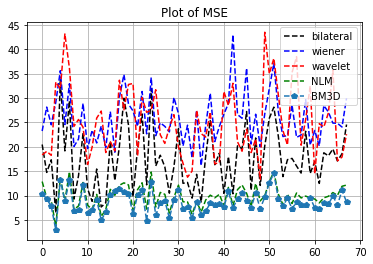

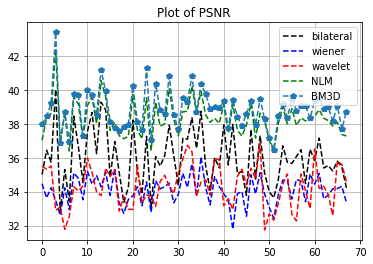

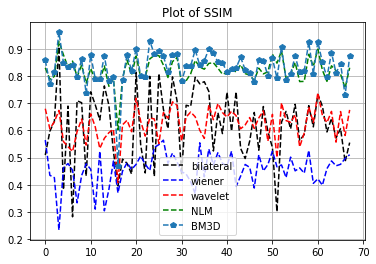

In [27]:
# original_image_path='../Dataset/CBSD68-Dataset/CBSD68/original_png'
# bilateral_filtering_25='../spatial_domain_filtering/bilateral_filtering/output_25'
# wiener_filtering_25='../spatial_domain_filtering/wiener_filtering/output_25'
# wavelet_filtering_25='../transform_domain_filtering/wavelet_filtering/output_25'
curr_path = os.getcwd()
# print(curr_path)

# parent directory
parent = os.path.dirname(curr_path)

original_image_path= parent+'/Datasets/CBSD68/original_png'
bilateral_filtering_25= parent+'/bilateral_filtering/output_25'
wiener_filtering_25 = parent+'/wiener_filtering/output_25'
wavelet_filtering_25 = parent+'/wavelet_filtering/output_25'
NLM_filtering_25 = parent+'/NLM_filtering/output_25'
BM3D_filtering_25 = parent+'/BM3D/output_25'

mse_list_bilateral,psnr_list_bilateral,ssim_list_bilateral=analyze_performance(original_image_path,bilateral_filtering_25)
mse_list_wiener,psnr_list_wiener,ssim_list_wiener=analyze_performance(original_image_path,wiener_filtering_25)
mse_list_wavelet,psnr_list_wavelet,ssim_list_wavelet=analyze_performance(original_image_path,wavelet_filtering_25)
mse_list_NLM,psnr_list_NLM,ssim_list_NLM=analyze_performance(original_image_path,NLM_filtering_25)
mse_list_BM3D,psnr_list_BM3D,ssim_list_BM3D=analyze_performance(original_image_path,BM3D_filtering_25)

plt.plot(mse_list_bilateral,'k--')
plt.plot(mse_list_wiener,'b--')
plt.plot(mse_list_wavelet,'r--')
plt.plot(mse_list_NLM,'g--')
plt.plot(mse_list_BM3D,'w--')
plt.grid()
plt.title('Plot of MSE')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()

plt.plot(psnr_list_bilateral,'k--')
plt.plot(psnr_list_wiener,'b--')
plt.plot(psnr_list_wavelet,'r--')
plt.plot(psnr_list_NLM,'g--')
plt.plot(psnr_list_BM3D,'w--')
plt.grid()
plt.title('Plot of PSNR')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()

plt.plot(ssim_list_bilateral,'k--')
plt.plot(ssim_list_wiener,'b--')
plt.plot(ssim_list_wavelet,'r--')
plt.plot(ssim_list_NLM,'g--')
plt.plot(ssim_list_BM3D,'w--')
plt.grid()
plt.title('Plot of SSIM')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()


### compare performance on noisy15 dataset

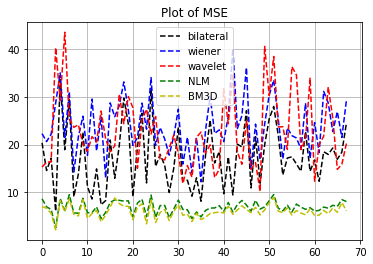

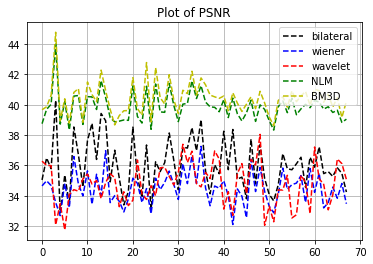

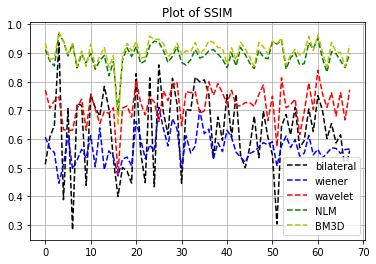

In [26]:
# original_image_path='../Dataset/CBSD68-Dataset/CBSD68/original_png'
# bilateral_filtering_15='../spatial_domain_filtering/bilateral_filtering/output_15'
# wiener_filtering_15='../spatial_domain_filtering/wiener_filtering/output_15'
# wavelet_filtering_15='../transform_domain_filtering/wavelet_filtering/output_15'

original_image_path= parent+'/Datasets/CBSD68/original_png'
bilateral_filtering_15= parent+'/bilateral_filtering/output_15'
wiener_filtering_15 = parent+'/wiener_filtering/output_15'
wavelet_filtering_15 = parent+'/wavelet_filtering/output_15'
NLM_filtering_15 = parent+'/NLM_filtering/output_15'
BM3D_filtering_15 = parent+'/BM3D/output_15'

mse_list_bilateral,psnr_list_bilateral,ssim_list_bilateral=analyze_performance(original_image_path,bilateral_filtering_15)
mse_list_wiener,psnr_list_wiener,ssim_list_wiener=analyze_performance(original_image_path,wiener_filtering_15)
mse_list_wavelet,psnr_list_wavelet,ssim_list_wavelet=analyze_performance(original_image_path,wavelet_filtering_15)
mse_list_NLM,psnr_list_NLM,ssim_list_NLM=analyze_performance(original_image_path,NLM_filtering_15)
mse_list_BM3D,psnr_list_BM3D,ssim_list_BM3D=analyze_performance(original_image_path,BM3D_filtering_15)

plt.plot(mse_list_bilateral,'k--')
plt.plot(mse_list_wiener,'b--')
plt.plot(mse_list_wavelet,'r--')
plt.plot(mse_list_NLM,'g--')
plt.plot(mse_list_BM3D,'y--')

plt.grid()
plt.title('Plot of MSE')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()

plt.plot(psnr_list_bilateral,'k--')
plt.plot(psnr_list_wiener,'b--')
plt.plot(psnr_list_wavelet,'r--')
plt.plot(psnr_list_NLM,'g--')
plt.plot(psnr_list_BM3D,'y--')
plt.grid()
plt.title('Plot of PSNR')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()

plt.plot(ssim_list_bilateral,'k--')
plt.plot(ssim_list_wiener,'b--')
plt.plot(ssim_list_wavelet,'r--')
plt.plot(ssim_list_NLM,'g--')
plt.plot(ssim_list_BM3D,'y--')

plt.grid()
plt.title('Plot of SSIM')
plt.legend(['bilateral','wiener','wavelet','NLM','BM3D'])
plt.show()
